# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [175]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


# Notebook Presentation

In [16]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format


# Read the Dataset

In [17]:

df_apps = pd.read_csv('apps.csv')
df_apps.shape

(10841, 12)

In [19]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'], dtype='object')

In [21]:
df_apps.sample(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3863,FD e-paper,NEWS_AND_MAGAZINES,3.10,183,7.10,"10,000",Free,0,Everyone,News & Magazines,"July 4, 2018",4.1 and up
7178,Complete Spanish Movies,ENTERTAINMENT,4.00,11656,4.50,"1,000,000",Free,0,Everyone,Entertainment,"January 20, 2018",4.0.3 and up
10221,KineMaster – Pro Video Editor,VIDEO_PLAYERS,4.50,1013867,32.00,"50,000,000",Free,0,Everyone,Video Players & Editors,"August 3, 2018",4.1 and up
10208,Tom's Love Letters,FAMILY,4.10,705805,35.00,"50,000,000",Free,0,Everyone,Entertainment,"April 30, 2018",4.1 and up
10100,Lep's World 🍀,GAME,4.30,696019,36.00,"50,000,000",Free,0,Everyone 10+,Arcade,"May 26, 2018",4.1 and up
3540,Ah! Cutie,FAMILY,3.90,536,10.00,"10,000",Free,0,Everyone,Casual,"June 27, 2017",4.0 and up
2649,Sago Mini Hat Maker,EDUCATION,4.90,11,63.00,"1,000",Paid,$3.99,Everyone,Education;Pretend Play,"July 24, 2017",4.0.3 and up
8923,LightX Photo Editor & Photo Effects,PHOTOGRAPHY,4.70,259450,17.00,"10,000,000",Free,0,Everyone,Photography,"May 24, 2018",4.1 and up
6382,Wi-Fi Master,TOOLS,4.50,3673,5.80,"500,000",Free,0,Everyone,Tools,"July 24, 2018",4.1 and up
239,Drug Calculator,MEDICAL,NaN,0,4.60,10,Free,0,Everyone,Medical,"July 27, 2018",4.4 and up


In [25]:
df_apps[df_apps.Category=='GAME'].sort_values('Installs', ascending=False)[:20]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
10778,Temple Run 2,GAME,4.30,8118937,62.00,"500,000,000",Free,0,Everyone,Action,"July 5, 2018",4.0 and up
10766,Candy Crush Saga,GAME,4.40,22429716,74.00,"500,000,000",Free,0,Everyone,Casual,"July 5, 2018",4.1 and up
10717,Pou,GAME,4.30,10485308,24.00,"500,000,000",Free,0,Everyone,Casual,"May 25, 2018",4.0 and up
10718,Pou,GAME,4.30,10485334,24.00,"500,000,000",Free,0,Everyone,Casual,"May 25, 2018",4.0 and up
10719,Pou,GAME,4.30,10486018,24.00,"500,000,000",Free,0,Everyone,Casual,"May 25, 2018",4.0 and up
10731,My Talking Tom,GAME,4.50,14891223,36.00,"500,000,000",Free,0,Everyone,Casual,"July 19, 2018",4.1 and up
10732,My Talking Tom,GAME,4.50,14892469,36.00,"500,000,000",Free,0,Everyone,Casual,"July 19, 2018",4.1 and up
10763,Candy Crush Saga,GAME,4.40,22426677,74.00,"500,000,000",Free,0,Everyone,Casual,"July 5, 2018",4.1 and up
10764,Candy Crush Saga,GAME,4.40,22428456,74.00,"500,000,000",Free,0,Everyone,Casual,"July 5, 2018",4.1 and up
10765,Candy Crush Saga,GAME,4.40,22428456,74.00,"500,000,000",Free,0,Everyone,Casual,"July 5, 2018",4.1 and up


In [45]:
columns_name = df_apps.columns[:-2]
df_apps_clean = df_apps[columns_name].dropna()
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


In [47]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [50]:
df_apps[df_apps.App == 'MouseMingle']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
1132,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating,"July 17, 2018",4.4 and up
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating,"July 17, 2018",4.4 and up


In [56]:
df_apps_clean = df_apps_clean.drop_duplicates(subset=["App", "Type", "Price"])
df_apps_clean.shape

(8199, 10)

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [60]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [61]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [66]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Booster",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [69]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

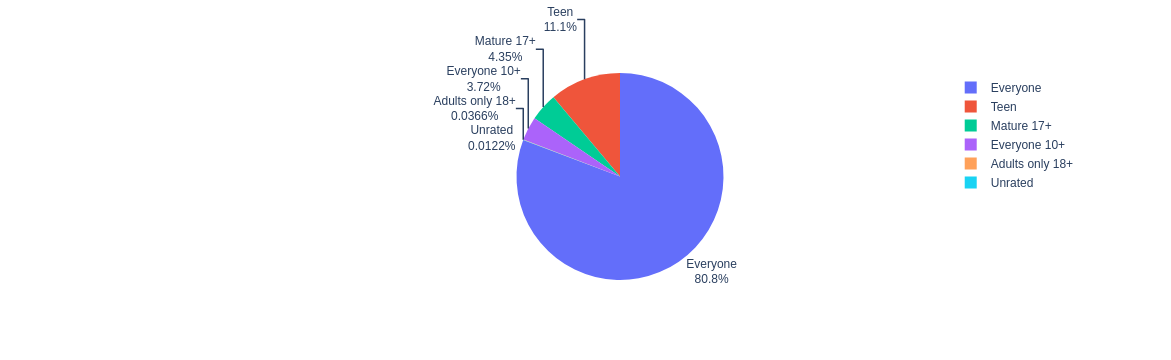

In [76]:
fig = px.pie(labels=ratings.index, values=ratings.values, names=ratings.index)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

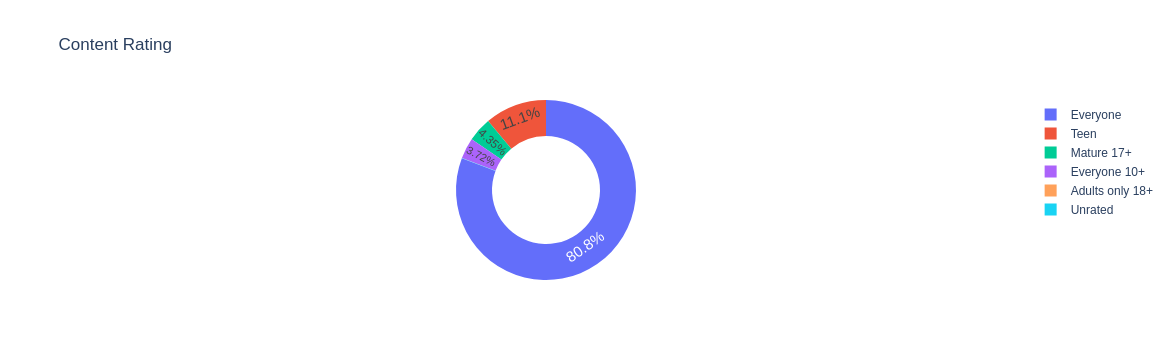

In [81]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

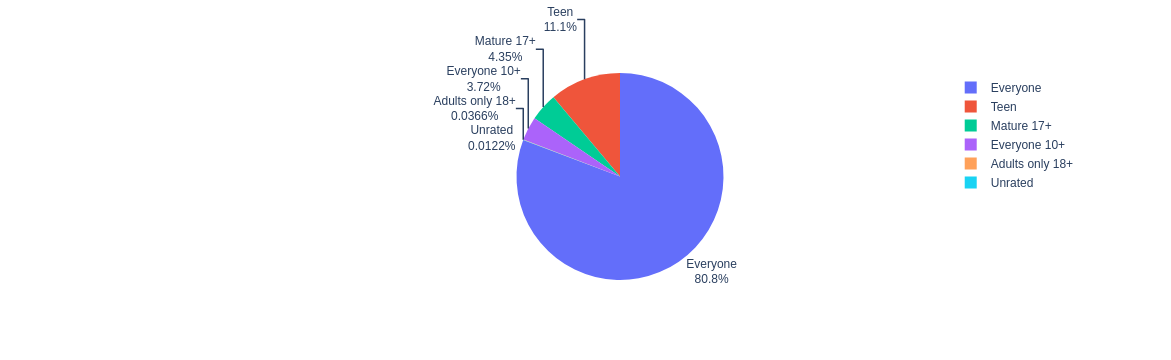

In [86]:
fig = px.pie(labels=ratings.index, values=ratings.values, names=ratings.index)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [87]:
df_apps_clean.Installs.describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [89]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [92]:
df_apps_clean[["App", "Installs"]].groupby('Installs').count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [93]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(",","")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[["App", "Installs"]].groupby("Installs").count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [95]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   int64  
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 704.6+ KB


In [101]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace("$","")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
df_apps_clean.sort_values("Price", ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [103]:
df_apps_clean = df_apps_clean[df_apps_clean.Price <250 ]
df_apps_clean.sort_values("Price", ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical
2207,EMT PASS,MEDICAL,3.40,51,2.40,1000,Paid,29.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,50000,Paid,29.99,Everyone,Sports
504,AP Art History Flashcards,FAMILY,5.00,1,96.00,10,Paid,29.99,Mature 17+,Education
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50,2921,25.00,100000,Paid,24.99,Everyone,Medical
3241,"Muscle Premium - Human Anatomy, Kinesiology, Bones",MEDICAL,4.20,168,25.00,10000,Paid,24.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [104]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values("Revenue_Estimate", ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [105]:
df_apps_clean.Category.nunique()

33

In [108]:
top10_category = df_apps_clean.Category.value_counts()[:10]

In [109]:
top10_category

Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

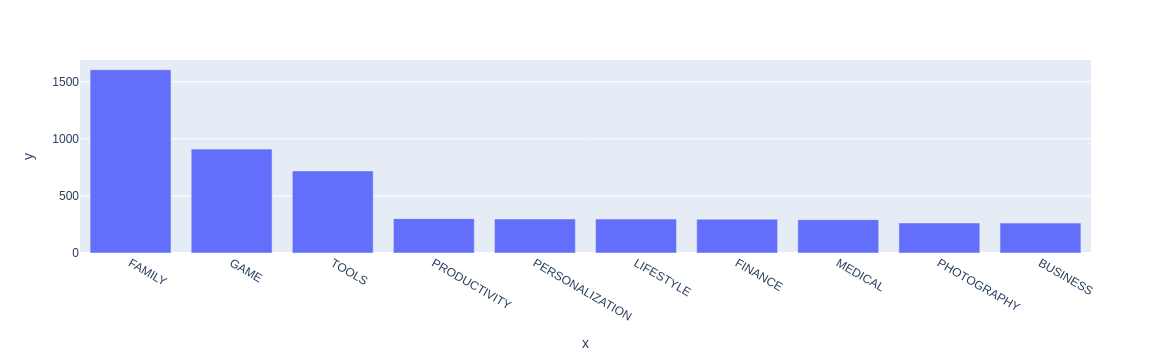

In [111]:
bar = px.bar(x = top10_category.index, y=top10_category.values)
bar.show()

In [137]:
category_installs = df_apps_clean.groupby('Category').agg({"Installs":pd.Series.sum})
category_installs.sort_values('Installs', ascending=False, inplace=True)
category_installs

,Installs
Category,
GAME,13858762717
COMMUNICATION,11039241530
TOOLS,8099724500
PRODUCTIVITY,5788070180
SOCIAL,5487841475
PHOTOGRAPHY,4649143130
FAMILY,4437554490
VIDEO_PLAYERS,3916897200
TRAVEL_AND_LOCAL,2894859300


### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

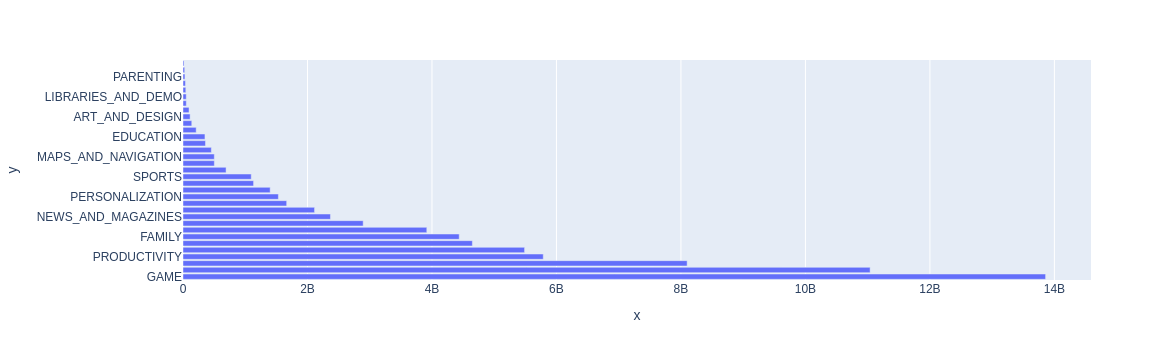

In [125]:
h_bar=px.bar(x =category_installs.Installs, y=category_installs.index, orientation='h')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [143]:
category_app = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})
cat_merged_df = pd.merge(category_app, category_installs, on='Category', how='inner')
cat_merged_df.shape
cat_merged_df.sort_values('Installs', ascending=False)

,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


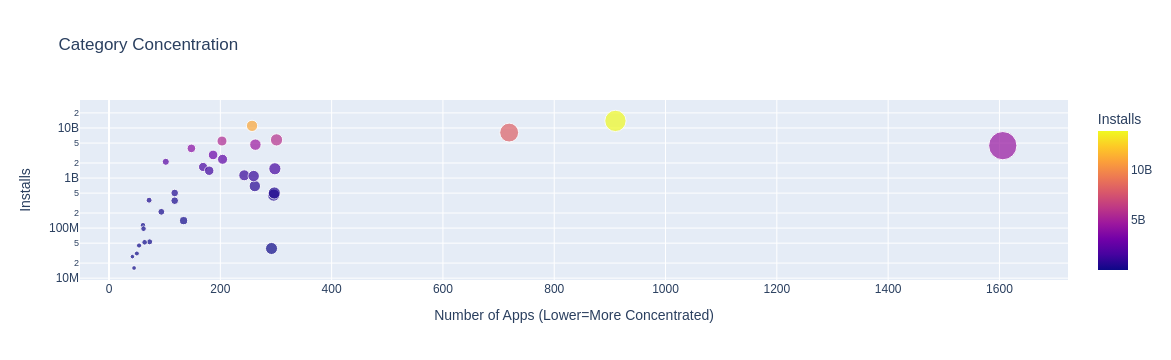

In [145]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='%log'))
 
scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [157]:
len(df_apps_clean.Genres.unique())

114

In [160]:
df_apps_clean.Genres.value_counts().sort_values()[:8]

Genres
Lifestyle;Pretend Play                 1
Strategy;Education                     1
Adventure;Education                    1
Role Playing;Brain Games               1
Tools;Education                        1
Casual;Music & Video                   1
Board;Pretend Play                     1
Health & Fitness;Action & Adventure    1
Name: count, dtype: int64

In [161]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


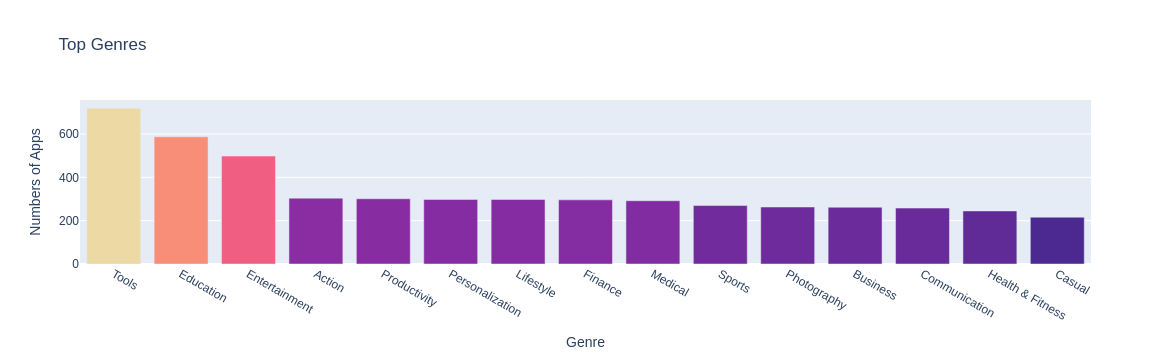

In [171]:
bar = px.bar(x=num_genres.index[:15], y = num_genres.values[:15],title='Top Genres', 
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
bar.update_layout(xaxis_title='Genre',
                  yaxis_title='Numbers of Apps',
                  coloraxis_showscale=False)
bar.show()

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [172]:
df_apps_clean.Type.value_counts()


Type
Free    7595
Paid     589
Name: count, dtype: int64

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [186]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
print(df_free_vs_paid.shape)
df_free_vs_paid.head()
df_free_vs_paid


(61, 3)


,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,8
57,VIDEO_PLAYERS,Free,144
58,VIDEO_PLAYERS,Paid,4
59,WEATHER,Free,65


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 


See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

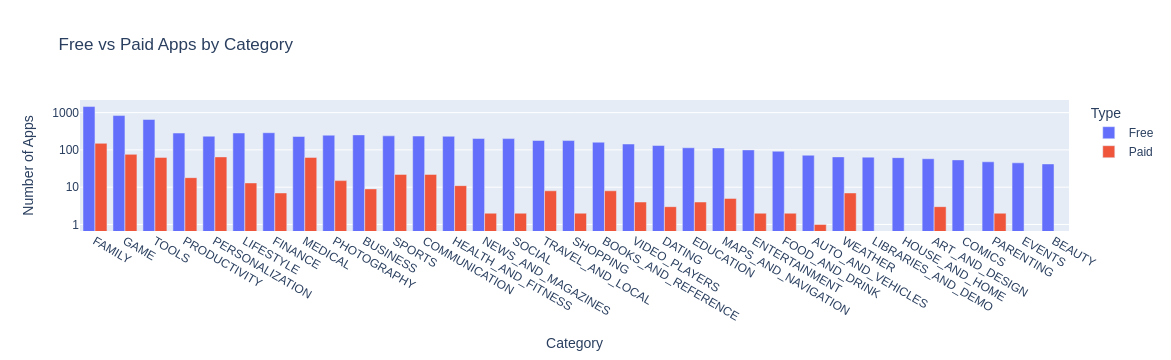

In [187]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.